In [1]:
import pandas as pd         # Importing Libraries
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
Fraud_check = pd.read_csv("Fraud_check.csv")  # Loading Dataset
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Understanding

In [3]:
Fraud_check.shape

(600, 6)

In [4]:
Fraud_check.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


## Data Preparation

In [6]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check['Undergrad']= label_encoder.fit_transform(Fraud_check['Undergrad']) 
Fraud_check['Marital.Status']= label_encoder.fit_transform(Fraud_check['Marital.Status']) 
Fraud_check['Urban']= label_encoder.fit_transform(Fraud_check['Urban']) 

In [7]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [8]:
Fraud_check.info

<bound method DataFrame.info of      Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4            

## Model Building

In [9]:
X = Fraud_check.drop("Taxable.Income",axis = 1)   #Feature Matrix
y = Fraud_check['Taxable.Income']

In [10]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [11]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

## Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)

In [13]:
X_train.shape, y_train.shape 

((480, 5), (480,))

In [14]:
X_test.shape, y_test.shape

((120, 5), (120,))

## Model Training

In [15]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

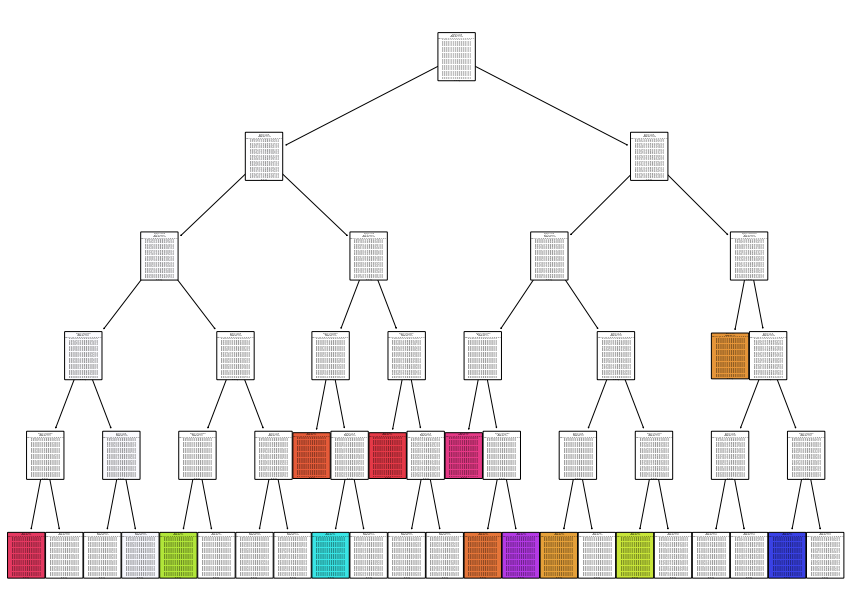

In [16]:
plt.figure(figsize = (15,11))
plot_tree(dt_model, rounded = True, filled = True)
plt.show()

## Model Testing

In [17]:
y_train_pred = dt_model.predict(X_train)

In [18]:
y_test_pred = dt_model.predict(X_test)

## Model Evaluation

In [19]:
accuracy_score(y_train,y_train_pred)  # For Train Data 

0.05625

In [20]:
confusion_matrix(y_train,y_train_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [21]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

       10003       0.03      1.00      0.05         1
       10150       0.00      0.00      0.00         1
       10163       0.02      1.00      0.04         1
       10329       0.03      1.00      0.06         1
       10348       0.02      1.00      0.04         1
       10379       0.01      1.00      0.02         1
       10455       0.00      0.00      0.00         1
       10735       0.00      0.00      0.00         1
       10870       0.00      0.00      0.00         1
       10900       0.03      1.00      0.06         1
       10933       1.00      1.00      1.00         1
       10987       0.00      0.00      0.00         1
       11784       0.00      0.00      0.00         1
       11794       0.00      0.00      0.00         1
       11804       0.00      0.00      0.00         1
       11865       1.00      1.00      1.00         1
       12011       0.00      0.00      0.00         1
       12072       0.00    

C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
accuracy_score(y_test,y_test_pred)

0.0

In [23]:
confusion_matrix(y_test,y_test_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       10003       0.00      0.00      0.00       0.0
       10163       0.00      0.00      0.00       0.0
       10329       0.00      0.00      0.00       0.0
       10348       0.00      0.00      0.00       0.0
       10379       0.00      0.00      0.00       0.0
       10900       0.00      0.00      0.00       0.0
       10933       0.00      0.00      0.00       0.0
       11865       0.00      0.00      0.00       0.0
       12083       0.00      0.00      0.00       1.0
       12453       0.00      0.00      0.00       0.0
       12682       0.00      0.00      0.00       1.0
       14300       0.00      0.00      0.00       1.0
       14398       0.00      0.00      0.00       0.0
       16316       0.00      0.00      0.00       1.0
       17183       0.00      0.00      0.00       0.0
       18199       0.00      0.00      0.00       1.0
       19272       0.00      0.00      0.00       1.0
       21016       0.00    

C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\

## Model Deployment

In [25]:
from pickle import dump, load

In [26]:
dump(dt_model,open('log_model.pkl','wb'))

In [27]:
dt_model_pickle = load(open('log_model.pkl','rb'))

In [28]:
pickle_pred = dt_model_pickle.predict(X_test)